# Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn
import imgaug
import tensorflow as tf
import random
import cv2
import os
import joblib # for saving the model

from keras import layers
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

import check

# Check the version of the packages, you can skip this if you are not encountering any errors
check.version(np, "1.25.2")
check.version(tf, "2.15.0")
check.version(keras, "2.15.0")
check.version(sklearn, "1.2.2")
check.version(imgaug, "0.4.0")


numpy version: 1.25.2 ✅
tensorflow version: 2.15.0 ✅
keras version: 2.15.0 ✅
sklearn version: 1.2.2 ✅
imgaug version: 0.4.0 ✅


# Project directory

In [3]:
# Get the project directory (context that the script is running in)
PROJECT_DIR = os.path.join(os.getcwd(), "..")

# Load dataset

In [4]:
DATASET_TYPE = "enhanced" # "enhanced" or "original"
DATASET = [
    "Real",
    "Altered/Altered-Easy",
    "Altered/Altered-Medium",
    "Altered/Altered-Hard",
]
imgs_dict = {
    dataset: np.load(os.path.join(PROJECT_DIR, f"dataset-{DATASET_TYPE}", dataset, "imgs.npz"))["arr_0"]
    for dataset in DATASET
}
labels_dict = {
    dataset: np.load(os.path.join(PROJECT_DIR, f"dataset-{DATASET_TYPE}", dataset, "labels.npy"))
    for dataset in DATASET
}

print(f"Shape of Real dataset: {imgs_dict['Real'].shape}")
print(f"Shape of Altered-Easy dataset: {imgs_dict['Altered/Altered-Easy'].shape}")
print(f"Shape of Altered-Medium dataset: {imgs_dict['Altered/Altered-Medium'].shape}")
print(f"Shape of Altered-Hard dataset: {imgs_dict['Altered/Altered-Hard'].shape}")

Shape of Real dataset: (6000, 90, 90, 1)
Shape of Altered-Easy dataset: (17931, 90, 90, 1)
Shape of Altered-Medium dataset: (17067, 90, 90, 1)
Shape of Altered-Hard dataset: (14272, 90, 90, 1)


# Load model

In [5]:
FILE_PATH = os.path.join(PROJECT_DIR, 'result/finalized_model.pkl')

# Load the trained model
model = joblib.load(FILE_PATH)

In [9]:
label_real_dict = {}

def get_match_key(y):
    key = y.astype(str)
    key = ''.join(key).zfill(6)

    return key

for i, y in enumerate(labels_dict["Real"]):
    key = get_match_key(y)
    label_real_dict[key] = i
print(label_real_dict)

{'100001': 0, '100004': 1, '100002': 2, '100003': 3, '100000': 4, '100011': 5, '100014': 6, '100012': 7, '100013': 8, '100010': 9, '101001': 10, '101004': 11, '101002': 12, '101003': 13, '101000': 14, '101011': 15, '101014': 16, '101012': 17, '101013': 18, '101010': 19, '102001': 20, '102004': 21, '102002': 22, '102003': 23, '102000': 24, '102011': 25, '102014': 26, '102012': 27, '102013': 28, '102010': 29, '103101': 30, '103104': 31, '103102': 32, '103103': 33, '103100': 34, '103111': 35, '103114': 36, '103112': 37, '103113': 38, '103110': 39, '104001': 40, '104004': 41, '104002': 42, '104003': 43, '104000': 44, '104011': 45, '104014': 46, '104012': 47, '104013': 48, '104010': 49, '105001': 50, '105004': 51, '105002': 52, '105003': 53, '105000': 54, '105011': 55, '105014': 56, '105012': 57, '105013': 58, '105010': 59, '106001': 60, '106004': 61, '106002': 62, '106003': 63, '106000': 64, '106011': 65, '106014': 66, '106012': 67, '106013': 68, '106010': 69, '107001': 70, '107004': 71, '

# Predict

1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 18ms/step
0.0
1/1 [==============================] - 0s 25ms/step
0.0
1/1 [==============================] - 0s 17ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 23ms/s

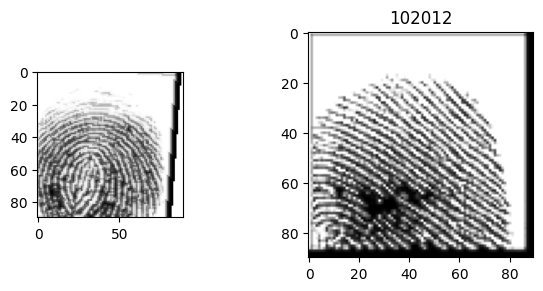

In [16]:
# import the Gabor function from gen_dataset_enhanced.py
from gen_dataset_enhanced import Gabor

img = cv2.imread(os.path.join(PROJECT_DIR, './dataset-raw/Real/1__M_Left_index_finger.BMP'), cv2.IMREAD_GRAYSCALE)
img = Gabor(img)    

seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-30, 30),
        order=[0, 1],
        cval=255
    )
], random_order=True)

img = seq.augment_image(img).reshape((1, 90, 90, 1)).astype(np.float32) / 255.

plt.subplot(1, 3, 1)
plt.imshow(img.squeeze(), cmap='gray')
count = 0

# Tìm kiếm kết quả phù hợp trong các ảnh đã đăng kí trước
for i in range(1000):
    tmp_img = imgs_dict["Real"][i].reshape((1, 90, 90, 1)).astype(np.float32) / 255.
    tmp_label = get_match_key(labels_dict["Real"][i])
    pred = model.predict([img, tmp_img])
    score = round(np.max(pred), 2)
    print(score)
    
    if (score >= 0.9):
        print("ASDOHASODUAJSD")
        count += 1
        plt.subplot(1, 2,2)
        plt.title(tmp_label)
        plt.imshow(imgs_dict["Real"][i].squeeze(), cmap='gray')
        break